<a href="https://colab.research.google.com/github/Anonymous3017/AI-ML-Training/blob/main/Day_9_Ayush_Track_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv("/content/students.csv")
df =pd.DataFrame(data)

In [ ]:
df.head()

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
null_hypo = "Proportion is same"
alt_hypo = "Proportion is not same"

In [ ]:
#sample = 500
df["gender"]

11      Female
13        Male
14      Female
17      Female
28        Male
         ...  
8229    Female
8234      Male
8235      Male
8238      Male
8239    Female
Name: gender, Length: 1753, dtype: object

In [ ]:
pd.crosstab(df["gender"].sample(n=500,random_state=42),df["gender"].sample(n=500,random_state=42))

gender,Female,Male
gender,,
Female,195,0
Male,0,305


In [ ]:
#270 + 230 =500 (sample size)

In [ ]:
#alpha
alpha=0.05


In [ ]:
#p = 1- alpha/2
p=1-alpha/2
dof=1
from scipy.stats import chi2, chisquare
chi2.ppf(p,dof)

5.023886187314888

In [ ]:
stat,p_value=chisquare([195,305],[250,250])

In [ ]:
p_value

8.683228085454693e-07

In [ ]:
stat

24.2

In [ ]:
df.shape

(1753, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 11 to 8239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   stud.id          1753 non-null   int64  
 1   name             1753 non-null   object 
 2   gender           1753 non-null   object 
 3   age              1753 non-null   int64  
 4   height           1753 non-null   int64  
 5   weight           1753 non-null   float64
 6   religion         1753 non-null   object 
 7   nc.score         1753 non-null   float64
 8   semester         1753 non-null   object 
 9   major            1753 non-null   object 
 10  minor            1753 non-null   object 
 11  score1           1753 non-null   float64
 12  score2           1753 non-null   float64
 13  online.tutorial  1753 non-null   int64  
 14  graduated        1753 non-null   int64  
 15  salary           1753 non-null   float64
dtypes: float64(5), int64(5), object(6)
memory usage: 232.8+ KB


In [ ]:
if p_value < alpha:
  print("True")
else:
  print("False")

True


# Assignment

### Problem Statement 1

Q1. Problem Statement: Data Pre-Processing (Categorical data)

You are given a dataset – “hotel_bookings.csv.” The dataset has a high number of null and elements that need to be cleansed; Your job is to create a separate DataFrame with only categorical columns and perform the following operations:

Find the number of null values in each column of the new DataFrame

Replace the null values with mode

In the "hotel" column, replace the hotel names with "0" and "1" based on the condition that – if, "hotel" = "city_hotel", then "hotel" = "1"; else, "0"

Using the label encoder, assign a unique country code to each country

Using onehot encoder, encode the “month” column

In [ ]:
hdata = pd.read_csv("/content/hotel_bookings.csv")
df =pd.DataFrame(hdata)

In [ ]:
hdata

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#create a separate DataFrame with only categorical columns
df1 = df.select_dtypes(include=['category', 'object'])
df1.shape

(119390, 12)

In [ ]:
# Find the number of null values in each column of the new DataFrame
null_counts = df1.isnull().sum()
null_counts

hotel                        0
arrival_date_month           0
meal                         0
country                    488
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64

In [ ]:
df1['country'] = df1['country'].fillna(df1["country"].mode()[0])

In [ ]:
clean_df = df1.isnull().sum()
clean_df

hotel                      0
arrival_date_month         0
meal                       0
country                    0
market_segment             0
distribution_channel       0
reserved_room_type         0
assigned_room_type         0
deposit_type               0
customer_type              0
reservation_status         0
reservation_status_date    0
dtype: int64

In [ ]:
df1['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
# In the "hotel" column, replace the hotel names with "0" and "1"
# based on the condition that – if, "hotel" = "city_hotel", then "hotel" = "1"; else, "0"
df1['hotel'] = df1['hotel'].apply(lambda x: 1 if x == 'City Hotel' else 0)

In [ ]:
df1['hotel'].value_counts()

1    79330
0    40060
Name: hotel, dtype: int64

In [ ]:
df1['country'].value_counts()

PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
# Using the label encoder, assign a unique country code to each country

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df1["country"])
df1["country"] = le.transform(df1["country"])

In [ ]:
df1['country'].value_counts()

135    49078
59     12129
56     10415
51      8568
43      7287
       ...  
44         1
27         1
70         1
172        1
119        1
Name: country, Length: 177, dtype: int64

In [ ]:
df1["arrival_date_month"].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

encoded_data = encoder.fit_transform(df1[["arrival_date_month"]])

df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["arrival_date_month"]))

df1 = pd.concat([df1, df_encoded], axis=1)

df1 = df1.drop("arrival_date_month", axis=1)

df2 = pd.DataFrame(df1)

   hotel meal  country market_segment distribution_channel reserved_room_type  \
0      0   BB      135         Direct               Direct                  C   
1      0   BB      135         Direct               Direct                  C   
2      0   BB       59         Direct               Direct                  A   
3      0   BB       59      Corporate            Corporate                  A   
4      0   BB       59      Online TA                TA/TO                  A   

  assigned_room_type deposit_type customer_type reservation_status  ...  \
0                  C   No Deposit     Transient          Check-Out  ...   
1                  C   No Deposit     Transient          Check-Out  ...   
2                  C   No Deposit     Transient          Check-Out  ...   
3                  A   No Deposit     Transient          Check-Out  ...   
4                  A   No Deposit     Transient          Check-Out  ...   

  arrival_date_month_December  arrival_date_month_February  \


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df2.head()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,0,BB,135,Direct,Direct,C,C,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,BB,135,Direct,Direct,C,C,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,BB,59,Direct,Direct,A,C,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,BB,59,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,BB,59,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# oe = OrdinalEncoder()

# oe.fit(df1[["arrival_date_month"]])

# df1["arrival_date_month"] = oe.transform(df1[["arrival_date_month"]])

# # df1["arrival_date_month"].head()

# df1["arrival_date_month"].value_counts()
# # df1["arrival_date_month"].unique()

Q2. Problem Statement: Data Pre-Processing (Exponential data)

Create a DataFrame to store exponential data using the NumPy np.random.exponential() (size=1000) function, and perform the following operations:

Using the minmax_scaling() function, scale the data between 0 to 1, and plot the original data and scaled data using the Seaborn library

Using preprocessing.normalize() function, normalize the data, and plot the original data and normalized data using the Seaborn library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import minmax_scale, normalize
import matplotlib.pyplot as plt

np.random.seed(42)

data = np.random.exponential(size=1000)

df = pd.DataFrame(data, columns=['Original Data'])

In [ ]:
df

,Original Data
0,0.469268
1,3.010121
2,1.316746
3,0.912943
4,0.169625
...,...
995,0.096051
996,2.492700
997,0.147130
998,3.000491


In [ ]:
scaled_data = minmax_scale(df['Original Data'])

In [ ]:
df.insert(1, "Scaled Data", scaled_data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Original Data  1000 non-null   float64
 1   Scaled Data    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


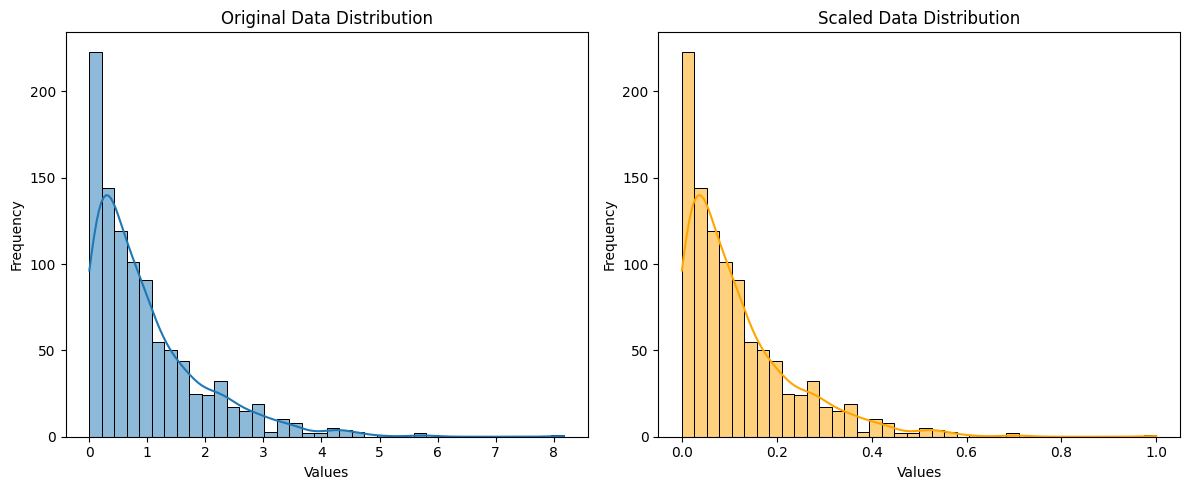

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(df['Original Data'], kde=True, ax=axes[0])
axes[0].set_title('Original Data Distribution')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

sns.histplot(df['Scaled Data'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Scaled Data Distribution')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
#Using preprocessing.normalize() function, normalize the data, and plot the original data and normalized data using the Seaborn library
normalized_data = normalize([df['Original Data']]).transpose()
len(normalized_data)

1000

In [ ]:
df.insert(2, "Normalized Data", normalized_data)

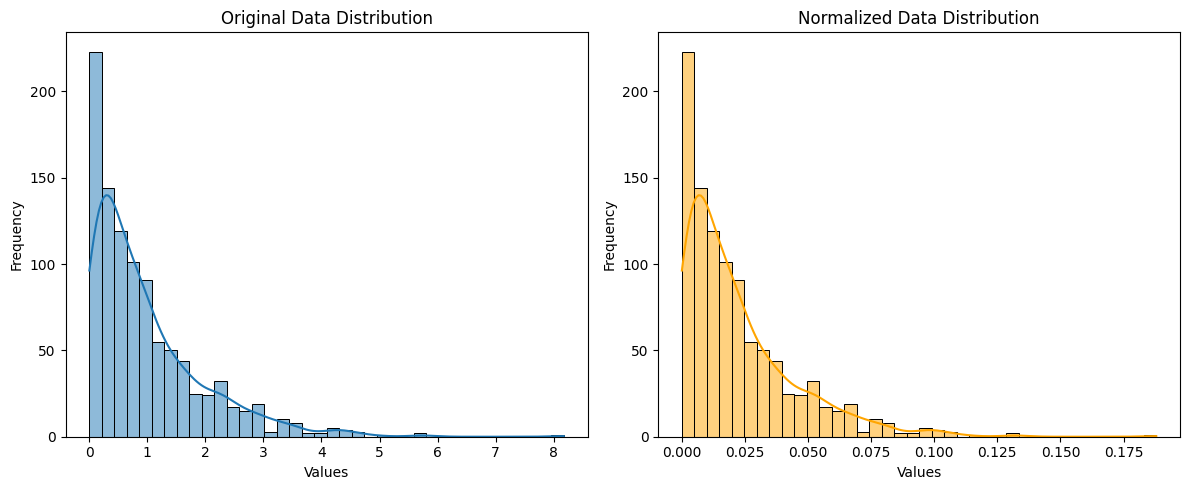

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(df['Original Data'], kde=True, ax=axes[0])
axes[0].set_title('Original Data Distribution')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

sns.histplot(df['Normalized Data'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Normalized Data Distribution')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()